python及び使用しているライブラリのバージョンの確認

In [1]:
import platform
print("python " + platform.python_version())
import pkg_resources
pkglist = ['numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'pandas']
for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

python 3.6.1
matplotlib 2.0.2
numpy 1.12.1
pandas 0.20.1
scikit-learn 0.18.1
seaborn 0.7.1


必要なライブラリのインポート

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pandasを使ったcsvデータの読み込み

In [3]:
data = pd.read_csv("get_wild_mafia.csv")
data

,Disk,No.,Song Name,Get Wild,ATK
0,1,1,Get Wild,8,30
1,1,2,Get Wild (“FANKS CRY-MAX” Version),14,90
2,1,3,GET WILD ’89,12,92
3,1,4,Get Wild (“CAROL TOUR FINAL CAMP FANKS!! ’89” ...,18,115
4,1,5,Get Wild (“RHYTHM RED TMN TOUR” Version),14,110
5,1,6,Get Wild (“tour TMN EXPO ARENA FINAL” Version),17,36
6,1,7,Get Wild (techno overdub mix),12,94
7,1,8,GET WILD ’89 (“TMN final live LAST GROOVE 5.18...,16,210
8,1,9,GET WILD DECADE RUN,16,30
9,1,10,GET WILD (“LIVE EPIC25” Version),8,118


matplotlibのスタイルの適用

In [4]:
plt.style.use('ggplot')

`get wild`の可視化

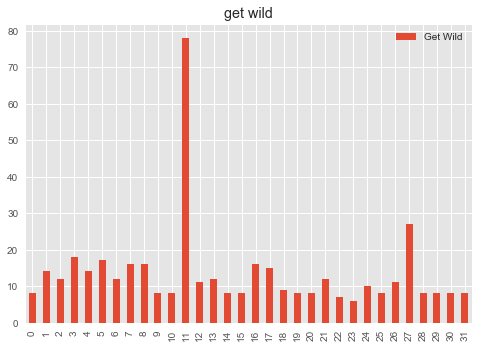

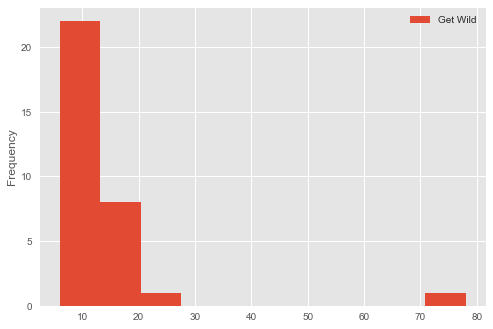

In [5]:
df_getwild = data.iloc[:, [3]]
df_getwild.plot.bar()
plt.title('get wild')
df_getwild.plot(kind='hist')
plt.show()

`ATK`回数の可視化

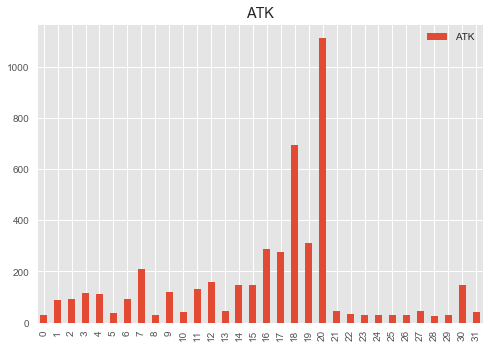

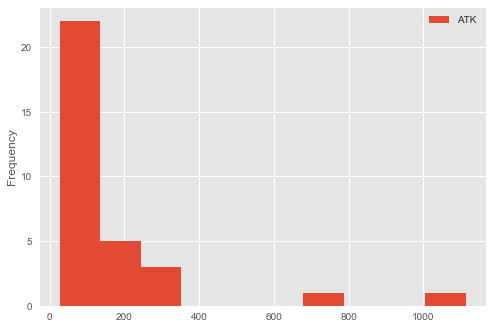

In [6]:
df_getwild = data.iloc[:, [4]]
df_getwild.plot.bar()
plt.title('ATK')
df_getwild.plot(kind='hist')
plt.show()

`Get Wild` と `AKT`で可視化

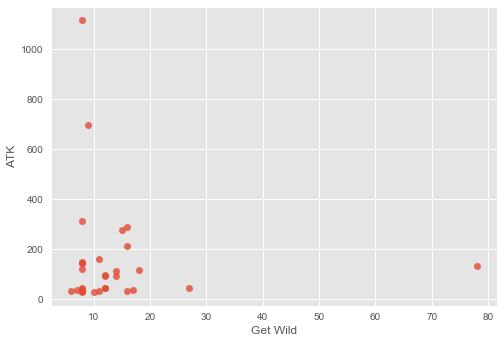

In [7]:
sns.regplot(x=data["Get Wild"], y=data["ATK"], fit_reg=False)
sns.plt.show()

`Get Wild`と`ATK`を正規化

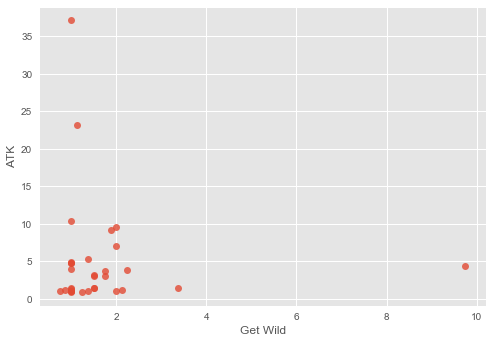

In [8]:
sns.regplot(x=data['Get Wild']/8, y=data['ATK']/30, fit_reg=False)
sns.plt.show()

K-Means法によるクラスタリング  
必要なライブラリのインポート

In [9]:
import numpy as np
from sklearn.cluster import KMeans

分析データから不要な情報を削除し正規化

In [10]:
analysis_data = pd.read_csv("get_wild_mafia.csv")
del(analysis_data['Disk'])
del(analysis_data['No.'])
analysis_data['Get Wild'] = analysis_data['Get Wild'] / 8
analysis_data['ATK'] = analysis_data['ATK'] / 30
analysis_data

,Song Name,Get Wild,ATK
0,Get Wild,1.000,1.000000
1,Get Wild (“FANKS CRY-MAX” Version),1.750,3.000000
2,GET WILD ’89,1.500,3.066667
3,Get Wild (“CAROL TOUR FINAL CAMP FANKS!! ’89” ...,2.250,3.833333
4,Get Wild (“RHYTHM RED TMN TOUR” Version),1.750,3.666667
5,Get Wild (“tour TMN EXPO ARENA FINAL” Version),2.125,1.200000
6,Get Wild (techno overdub mix),1.500,3.133333
7,GET WILD ’89 (“TMN final live LAST GROOVE 5.18...,2.000,7.000000
8,GET WILD DECADE RUN,2.000,1.000000
9,GET WILD (“LIVE EPIC25” Version),1.000,3.933333


PandasのデータフレームからNumpyの行列に変換して、行列を転置

In [11]:
data_array = np.array([analysis_data['Get Wild'].tolist(), analysis_data['ATK'].tolist()], np.int32)
data_array = data_array.T

クラスタリングの実行

In [12]:
N_CLUSTER = 5
pred = KMeans(n_clusters=N_CLUSTER).fit_predict(data_array)
pred

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 3, 2, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

分析データにクラスタ番号を追加

In [13]:
analysis_data['cluster_id'] = pred
analysis_data

,Song Name,Get Wild,ATK,cluster_id
0,Get Wild,1.000,1.000000,0
1,Get Wild (“FANKS CRY-MAX” Version),1.750,3.000000,0
2,GET WILD ’89,1.500,3.066667,0
3,Get Wild (“CAROL TOUR FINAL CAMP FANKS!! ’89” ...,2.250,3.833333,0
4,Get Wild (“RHYTHM RED TMN TOUR” Version),1.750,3.666667,0
5,Get Wild (“tour TMN EXPO ARENA FINAL” Version),2.125,1.200000,0
6,Get Wild (techno overdub mix),1.500,3.133333,0
7,GET WILD ’89 (“TMN final live LAST GROOVE 5.18...,2.000,7.000000,3
8,GET WILD DECADE RUN,2.000,1.000000,0
9,GET WILD (“LIVE EPIC25” Version),1.000,3.933333,0


各クラスタに属するサンプル数の分布

In [14]:
analysis_data['cluster_id'].value_counts()

0    25
3     4
4     1
2     1
1     1
Name: cluster_id, dtype: int64

クラスタの傾向を可視化

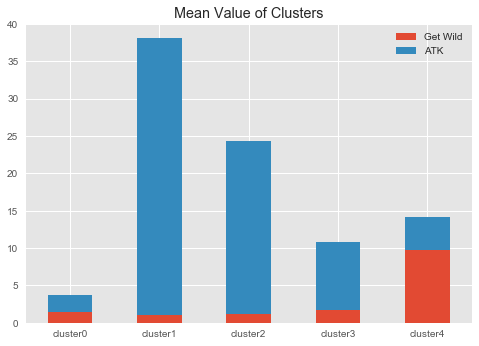

In [15]:
clusterinfo = pd.DataFrame()
for i in range(N_CLUSTER):
    clusterinfo['cluster' + str(i)] = analysis_data[analysis_data['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

sns.plt.show()

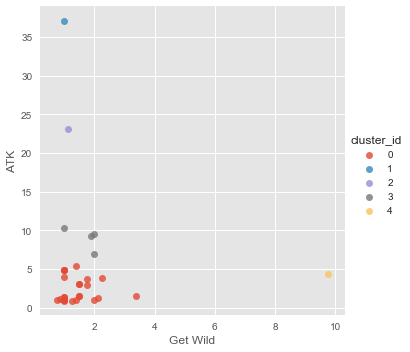

In [16]:
sns.lmplot(x='Get Wild', y='ATK', hue='cluster_id', data=analysis_data, fit_reg=False)
sns.plt.show()